In [1]:
import pandas as pd

In [19]:
infile = open("CDC_data.csv","r")
lines = []
headerLine = infile.readline()
headers = headerLine.strip().split(",")
#print(headers)
count = 0
while (True):
    line = infile.readline()
    if line == "":
        break;
    lines.append(line)
    count+=1
    #if (count > 1000000):
        #break
#print(lines)
ageDict = {}#for age and race data
ageDict2 = {}#for age and gender data
ageDict3 = {}#for age and death data
ageDict4 = {}#for age and exposure data
ageDict5 = {}#for age and comorbidity data
races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]
sexes = ["Female","Male","NA"]
underlyingCond = ["No value","Yes","No"]
exposure = ["Missing","Yes","No"]
hospital = ["Missing","No","Unknown","Yes"]
death=["No","Missing","Unknown","NA","Yes"]
symptoms=["Symptomatic","Missing","Unknown","Asymptomatic","nul"]
interval=["No value",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for line in lines:
    tokens = line.strip().split(",")
    age_group = tokens[headers.index("age_group")]
    sex = tokens[headers.index("sex")]
    race = tokens[headers.index("race")]
    deceased = tokens[headers.index("death_yn")]
    exposure = tokens[headers.index("exposure_yn")]
    comorbidity = tokens[headers.index("underlying_conditions_yn")]
    if (race in races and age_group in ageGroups):
        ageDict.setdefault(age_group,[]).append(race)
    if (sex in sexes and age_group in ageGroups):
        ageDict2.setdefault(age_group,[]).append(sex)
    if (deceased == "Yes" and age_group in ageGroups):
        ageDict3.setdefault(age_group,[]).append(deceased)
    if (exposure == "Yes" and age_group in ageGroups):
        ageDict4.setdefault(age_group,[]).append(exposure)
    if ((comorbidity == "Yes" or comorbidity == "No") and age_group in ageGroups):
        ageDict5.setdefault(age_group,[]).append(comorbidity)
#print(ageDict)
#2 min for all records

In [13]:
#print(ageDict3)
age_deceased_dict = {}
for key in ageDict3:
    age_deceased_dict[key]= len(ageDict3[key])
print(age_deceased_dict)

{'65+ years': 269269, '50 to 64 years': 26660, '18 to 49 years': 5240}


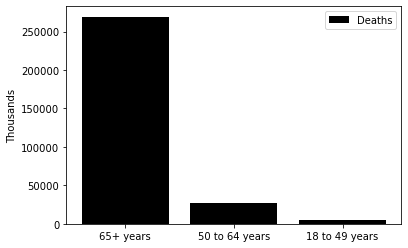

In [15]:
import matplotlib.pyplot as plt

D = age_deceased_dict

plt.bar(range(len(D)), list(D.values()), align='center',color='black')
plt.xticks(range(len(D)), list(D.keys()))
plt.legend(['Deaths'])
plt.ylabel('Thousands')
plt.show()
#Deaths by age group

In [37]:
age_exposure_dict = {}
for key in ageDict4:
    age_exposure_dict[key]= len(ageDict4[key])
sorted_keys2 = sorted(age_exposure_dict)
sorted_age_exposure_dict = {}
for key in sorted_keys2:
    sorted_age_exposure_dict[key] = age_exposure_dict[key]
print(sorted_age_exposure_dict)

{'0 - 17 years': 360477, '18 to 49 years': 1049232, '50 to 64 years': 374266, '65+ years': 303778}


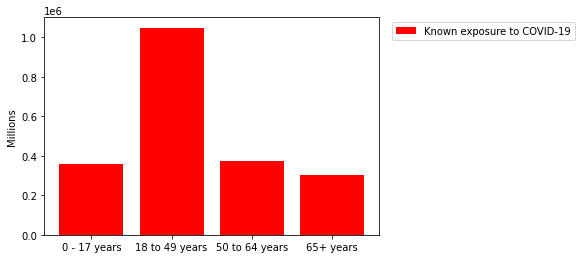

In [41]:
import matplotlib.pyplot as plt

Exp = sorted_age_exposure_dict

plt.bar(range(len(Exp)), list(Exp.values()), align='center',color='red')
plt.xticks(range(len(Exp)), list(Exp.keys()))
plt.legend(['Known exposure to COVID-19'], bbox_to_anchor=(1.6,1), loc='upper right', ncol=1)
plt.ylabel('Millions')
plt.show()
#Known exposure to COVID-19 by age group

In [34]:
age_comorbidity_dict = {}
for key in ageDict5:
    comorbidDict = {}
    for item in ageDict5[key]:
        comorbidDict[item] = comorbidDict.get(item, 0) + 1
    age_comorbidity_dict[key] = comorbidDict
#print(age_comorbidity_dict)
for key in age_comorbidity_dict:
    age_comorbidity_dict[key]["total"] = age_comorbidity_dict[key]["Yes"] + age_comorbidity_dict[key]["No"]
#print(age_comorbidity_dict)
percent_morbid_dict= {}
for key in age_comorbidity_dict:
    percent_morbid_dict[key] = round(100.0*age_comorbidity_dict[key]["Yes"]/age_comorbidity_dict[key]["total"],2)
sorted_keys = sorted(percent_morbid_dict)
sorted_percent_morbid_dict = {}
for key in sorted_keys:
    sorted_percent_morbid_dict[key] = percent_morbid_dict[key]
print(sorted_percent_morbid_dict)

{'0 - 17 years': 93.33, '18 to 49 years': 97.56, '50 to 64 years': 99.08, '65+ years': 99.71}


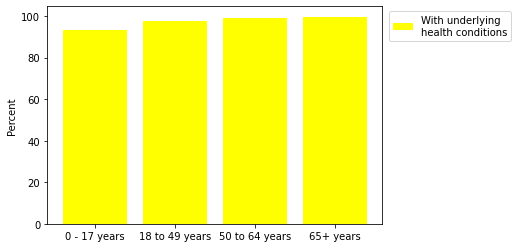

In [35]:
import matplotlib.pyplot as plt

pExp = sorted_percent_morbid_dict

plt.bar(range(len(pExp)), list(pExp.values()), align='center',color='yellow')
plt.xticks(range(len(pExp)), list(pExp.keys()))
plt.legend(['With underlying\nhealth conditions'], bbox_to_anchor=(1.4,1), loc='upper right', ncol=1)
plt.ylabel('Percent')
plt.show()
#Age group by comorbidity

In [3]:
age_race_dict = {}
for key in ageDict:
    raceDict = {}
    for item in ageDict[key]:
        raceDict[item] = raceDict.get(item, 0) + 1
    age_race_dict[key] = raceDict
print(age_race_dict)
#5 sec for all records
#we could make a chart showing for each age group, which race has the highest counts

{'0 - 17 years': {'Black': 372493, 'Native Hawaiian/Other Pacific Islander': 5442, 'White': 1815380, 'American Indian/Alaska Native': 41228, 'Multiple/Other': 186481, 'Asian': 65984}, '18 to 49 years': {'Black': 1570111, 'Multiple/Other': 782495, 'White': 7453597, 'American Indian/Alaska Native': 142019, 'Asian': 401123, 'Native Hawaiian/Other Pacific Islander': 29674}, '50 to 64 years': {'White': 2937094, 'Black': 488366, 'American Indian/Alaska Native': 32504, 'Multiple/Other': 192711, 'Asian': 113692, 'Native Hawaiian/Other Pacific Islander': 5338}, '65+ years': {'Black': 265935, 'White': 2260857, 'American Indian/Alaska Native': 13622, 'Multiple/Other': 96735, 'Asian': 63876, 'Native Hawaiian/Other Pacific Islander': 1751}}


In [4]:
def numByRace(race):
    numDict = {}
    for key in age_race_dict:
        if (race in age_race_dict[key]):
            numDict[key]=age_race_dict[key][race]
        else:
            numDict[key]=0
    return numDict
print(numByRace('Black'))

{'0 - 17 years': 372493, '18 to 49 years': 1570111, '50 to 64 years': 488366, '65+ years': 265935}


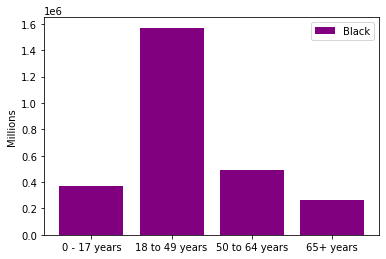

In [18]:
import matplotlib.pyplot as plt
B = numByRace('Black')

plt.bar(range(len(B)), list(B.values()), align='center', color='purple')
plt.xticks(range(len(B)), list(B.keys()))
plt.legend(['Black'])
plt.ylabel('Millions')

plt.show()
#Black

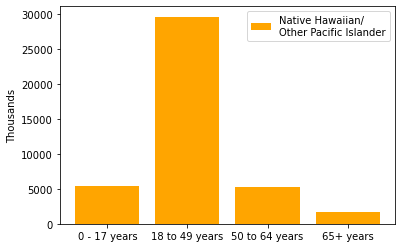

In [14]:
import matplotlib.pyplot as plt
NH = numByRace('Native Hawaiian/Other Pacific Islander')

plt.bar(range(len(NH)), list(NH.values()), align='center', color='orange')
plt.xticks(range(len(NH)), list(NH.keys()))
plt.legend(['Native Hawaiian/\nOther Pacific Islander'])
plt.ylabel('Thousands')


plt.show()
#Native Hawaiian/Pacific Islander

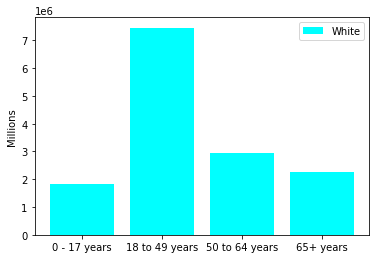

In [17]:
import matplotlib.pyplot as plt
W = numByRace('White')

plt.bar(range(len(W)), list(W.values()), align='center', color='cyan')
plt.xticks(range(len(W)), list(W.keys()))
plt.legend(['White'])
plt.ylabel('Millions')
plt.show()
#White

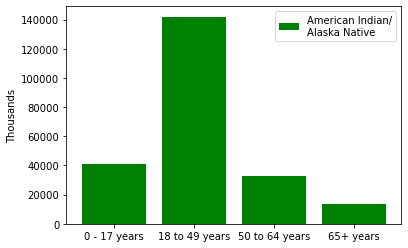

In [20]:
import matplotlib.pyplot as plt
A = numByRace('American Indian/Alaska Native')

plt.bar(range(len(A)), list(A.values()), align='center',color='green')
plt.xticks(range(len(A)), list(A.keys()))
plt.legend(['American Indian/\nAlaska Native'])
plt.ylabel('Thousands')
plt.show()
#American Indian/Alaska Native

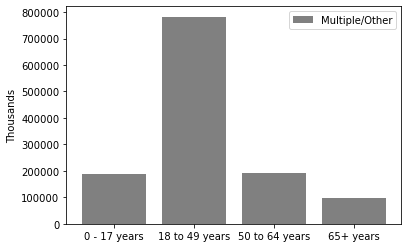

In [21]:
import matplotlib.pyplot as plt
M = numByRace('Multiple/Other')

plt.bar(range(len(M)), list(M.values()), align='center', color='grey')
plt.xticks(range(len(M)), list(M.keys()))
plt.legend(['Multiple/Other'])
plt.ylabel('Thousands')
plt.show()
#Multiple/Other

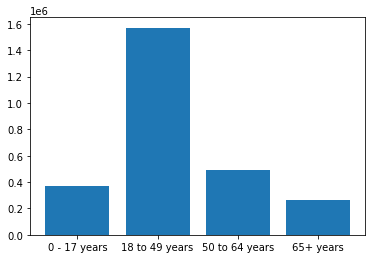

In [22]:
import matplotlib.pyplot as plt
ASI = numByRace('Black')

plt.bar(range(len(ASI)), list(ASI.values()), align='center')
plt.xticks(range(len(ASI)), list(ASI.keys()))

plt.show()
#Asian

In [30]:
age_sex_dict = {}
for key in ageDict2:
    sexDict = {}
    for item in ageDict2[key]:
        sexDict[item] = sexDict.get(item, 0) + 1
    age_sex_dict[key] = sexDict
print(age_sex_dict)
#5 seconds for all records
#we could make a chart showing for each age group, which race has the highest counts
#if we include NA as a category, then it is unclear whether Females really have a higher count or
#if the NA + Males would give similar numbers to Females.
#So, I propose that we look at the gender data organized by ethnicity
#(eg. Black female, Black male, White female, White male etc.)

{'0 - 17 years': {'NA': 130113, 'Female': 2135687, 'Male': 2157702}, '18 to 49 years': {'NA': 250176, 'Female': 8916678, 'Male': 8014975}, '50 to 64 years': {'NA': 136797, 'Female': 3131012, 'Male': 2944134}, '65+ years': {'Female': 2152851, 'Male': 1790839, 'NA': 116998}}


In [31]:
def numBySex(race):
    numDict2 = {}
    for key in age_sex_dict:
        if (race in age_sex_dict[key]):
            numDict2[key]=age_sex_dict[key][sex]
        else:
            numDict2[key]=0
    return numDict2
print(numBySex('NA'))

{'0 - 17 years': 2157702, '18 to 49 years': 8014975, '50 to 64 years': 2944134, '65+ years': 1790839}


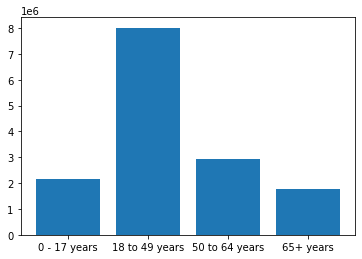

In [32]:
import matplotlib.pyplot as plt
NA = numBySex('NA')

plt.bar(range(len(NA)), list(NA.values()), align='center')
plt.xticks(range(len(NA)), list(NA.keys()))

plt.show()
#NA Gender

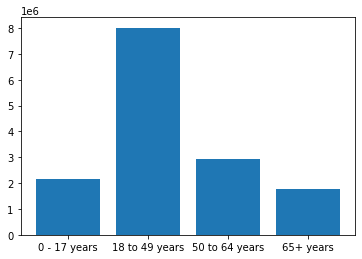

In [33]:
import matplotlib.pyplot as plt
F = numBySex('Female')

plt.bar(range(len(F)), list(F.values()), align='center')
plt.xticks(range(len(F)), list(F.keys()))

plt.show()
#Female Gender

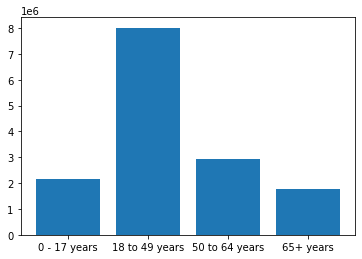

In [34]:
import matplotlib.pyplot as plt
Male = numBySex('Male')

plt.bar(range(len(Male)), list(Male.values()), align='center')
plt.xticks(range(len(Male)), list(Male.keys()))

plt.show()
#Male Gender

In [ ]:
#I think we could do resident state and ethnicity w/gender

In [ ]:
#I think we could do symptom status and gender